In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Adjusting the classification threshold

- [Precision/Recall Trade-off](#Precision/Recall-Trade-off)
- [ROC curve and AUC score](#ROC-curve-and-AUC-score)

In [4]:
# load the pima indian dataset
url = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/pima.csv'
pima = pd.read_csv(url)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
pima.shape

(768, 9)

In [6]:
# define X and y
X = pima.drop('label',axis=1)
y = pima.label

# train/test split
X_train,X_test,y_train,y_test = train_test_split(X,y)

# instantiate the logistic regression classifier
logreg_clf = LogisticRegression(max_iter=1000)

# train the model
logreg_clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

Let's look at how the classifier makes its prediction. 
For each patient, logistic regression computes the probability of that patient having diabetes

In [7]:
# first column is the probability of label=0, second column is the probability of label=1
logreg_clf.predict_proba(X_test)

array([[0.54093589, 0.45906411],
       [0.57448419, 0.42551581],
       [0.34145054, 0.65854946],
       [0.80524148, 0.19475852],
       [0.93791558, 0.06208442],
       [0.83704839, 0.16295161],
       [0.85274635, 0.14725365],
       [0.709765  , 0.290235  ],
       [0.93774851, 0.06225149],
       [0.8652373 , 0.1347627 ],
       [0.80822094, 0.19177906],
       [0.47802178, 0.52197822],
       [0.69221985, 0.30778015],
       [0.34337348, 0.65662652],
       [0.41836432, 0.58163568],
       [0.1710907 , 0.8289093 ],
       [0.28144517, 0.71855483],
       [0.22682067, 0.77317933],
       [0.30137875, 0.69862125],
       [0.93183426, 0.06816574],
       [0.20791966, 0.79208034],
       [0.60970985, 0.39029015],
       [0.84626915, 0.15373085],
       [0.55612054, 0.44387946],
       [0.84834756, 0.15165244],
       [0.45400974, 0.54599026],
       [0.20220603, 0.79779397],
       [0.98474956, 0.01525044],
       [0.85061771, 0.14938229],
       [0.7542056 , 0.2457944 ],
       [0.

In [8]:
# probability of label = 1 (diabetes)
proba = logreg_clf.predict_proba(X_test)[:,1]
proba

array([0.45906411, 0.42551581, 0.65854946, 0.19475852, 0.06208442,
       0.16295161, 0.14725365, 0.290235  , 0.06225149, 0.1347627 ,
       0.19177906, 0.52197822, 0.30778015, 0.65662652, 0.58163568,
       0.8289093 , 0.71855483, 0.77317933, 0.69862125, 0.06816574,
       0.79208034, 0.39029015, 0.15373085, 0.44387946, 0.15165244,
       0.54599026, 0.79779397, 0.01525044, 0.14938229, 0.2457944 ,
       0.54579454, 0.11983085, 0.35307783, 0.04528619, 0.23967073,
       0.2980134 , 0.28175619, 0.3591408 , 0.13087044, 0.75241218,
       0.33212923, 0.71001544, 0.93261492, 0.44152136, 0.05390953,
       0.80556693, 0.35593648, 0.19517522, 0.02460516, 0.42031681,
       0.11950626, 0.12168378, 0.06979109, 0.45688138, 0.07222065,
       0.15037513, 0.67278226, 0.77946208, 0.39583401, 0.6098061 ,
       0.47371913, 0.04091582, 0.13928368, 0.00181289, 0.15402598,
       0.01835373, 0.19041502, 0.04815016, 0.45344063, 0.1243771 ,
       0.52484154, 0.17193847, 0.18137437, 0.0562163 , 0.20556

Scikit-learn does not let you set the threshold directly.
Scikit-learn models predict label=1 if the probability is larger than 0.5, otherwise they predicts label = 0.

In [9]:
# sklearn predictions uses threshold = 0.5
y_test_pred = logreg_clf.predict(X_test)
y_test_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0], dtype=int64)

In [10]:
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.7708333333333334
0.5714285714285714
0.7407407407407407


In [11]:
# predictions with a different threshold
threshold = 0.3 # set new threshold
y_test_pred = np.zeros(len(y_test)) # vector of all zeros
y_test_pred[proba > threshold]=1 # set entry to 1 if probability is larger than the threshold
y_test_pred

array([1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 1., 0., 0.])

In [12]:
print(accuracy_score(y_test,y_test_pred))
print(recall_score(y_test,y_test_pred))
print(precision_score(y_test,y_test_pred))

0.7395833333333334
0.7571428571428571
0.6162790697674418


We can loop over different thresholds and check which one gives the best evaluation metric (accuracy, recall, precision, etc).

In [13]:
# create an array with different thresholds 
thresholds = np.linspace(0,1,100) # 100 evenly spaced points on [0,1]
thresholds

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [14]:
accuracies = []
recalls = []
precisions = []
# loop over thresholds list
for threshold in thresholds:
    y_test_pred = np.zeros(len(y_test)) # vector of all zeros
    y_test_pred[proba > threshold]=1
    # accuracy
    accuracies.append(accuracy_score(y_test,y_test_pred))
    # recall
    recalls.append(recall_score(y_test,y_test_pred))
    # precision
    precisions.append(precision_score(y_test,y_test_pred))

C:\Users\javier.perez-alvaro\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


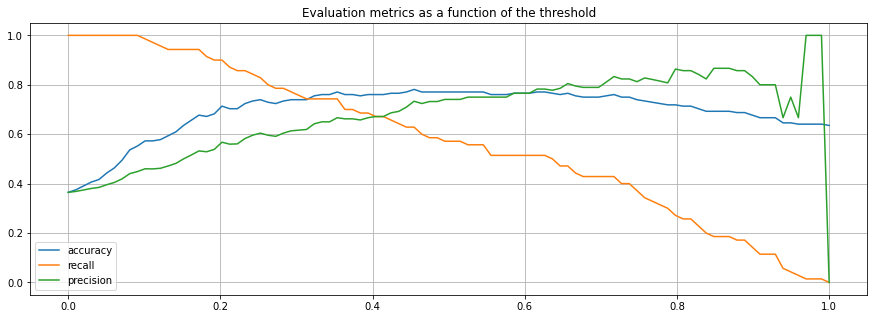

In [15]:
fig, axes = plt.subplots(figsize=(15,5))

axes.plot(thresholds,accuracies,label='accuracy')
axes.plot(thresholds,recalls,label='recall')
axes.plot(thresholds,precisions,label='precision')

axes.grid(True)
axes.set_title('Evaluation metrics as a function of the threshold')
axes.legend()


## Precision/Recall Trade-off

Text(0, 0.5, 'precision')

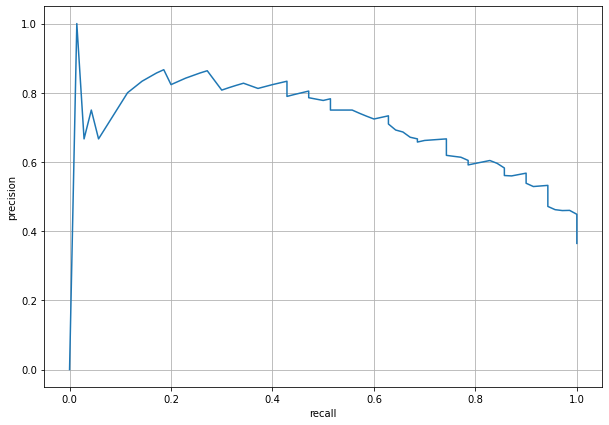

In [16]:
# precision vs recall curve
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(recalls,precisions)
ax.grid(True)
ax.set_xlabel('recall')
ax.set_ylabel('precision')

The precision-recall curve shows the tradeoff between precision and recall for different threshold. A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

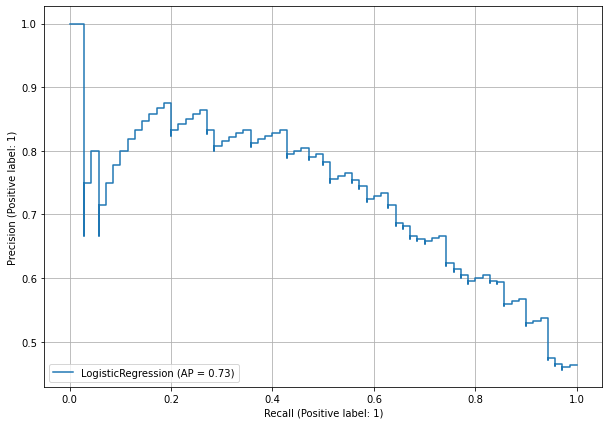

In [18]:
from sklearn.metrics import PrecisionRecallDisplay
# to plot the precision-recall curve, you should use PrecisionRecallDisplay
fig, ax = plt.subplots(figsize=(10,7))
PrecisionRecallDisplay.from_estimator(logreg_clf,X_test,y_test,ax=ax)
ax.grid(True)

AP refers to "average precision", which is the area under the precision-recall curve

In [19]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test,proba)

0.7300959009093448

## ROC curve and AUC score

ROC stands for "receiver operating characteristic" (it was initially designed for evaluating the strength of radar detectors during WW2).
ROC shows how well a model can separate two classes.

The ROC curve is based on two quantities:

- False positive rate (FPR): the fraction of false positives among all negative examples
- True positive rate (TPR): the fraction of true positives among all positive examples.

Like precision and recall, these values are based on the confusion matrix.

\begin{align*}
&\mathrm{FPR} = \frac{\mathrm{FP}}{\mathrm{FP}+\mathrm{TN}} \\
&\mathrm{TPR} = \frac{\mathrm{TP}}{\mathrm{TP}+\mathrm{FN}}
\end{align*}

To create a ROC curve, we plot FPR and TPR against each other.

In [ ]:
from sklearn.metrics import RocCurveDisplay

In [ ]:
RocCurveDisplay.from_estimator(logreg_clf,X_test,y_test)

AUC refers to "area under the curve". It measures the area under the TPR-FPR curve.

If all we need is the AUC, we don't need to compute the ROC curve first. 
We can take a shortcut and use the `roc_auc_score` function from Scikit-learn.

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,proba)

| AUC | Model performance |
| - | - |
| 0.5 | random |
| 0.6 | poor |
| 0.7 | weak |
| 0.8 | decent |
| 0.9 | good |
| 1.0 | perfect |